In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### Comparing Friis and RT LOS estimation

In [2]:
ds = np.linspace(5,600,400)
freq = 300000000.0
c = 300000000.0
## Friis
true_fspl = -1*(20*np.log10(freq) + 20*np.log10(ds) + 20*np.log10((4*np.pi)/c))
## RT LOS estimation, Q is the ratio of hit_rays/total_rays
r = np.sqrt(1/np.pi)
Q = (np.pi*np.power(r,2))/(4*np.pi*np.power(ds,2))
my_fspl = -1*((-10.0 * np.log10(Q)) + (10 * np.log10(4*np.pi)) + (20 * np.log10(freq/c)))

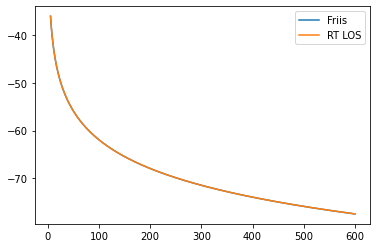

[-77.54722229]


In [3]:
plt.plot(ds, true_fspl, label='Friis')
plt.plot(ds, my_fspl, label='RT LOS')
plt.legend(loc='upper right')
plt.show()
print(true_fspl[-1:])

### Comparing Friis with actual RT simulation results
Static size receiver radius. Set to sqrt(1/pi).

Rays shot = 2e7

In [4]:
f2 = "static_radius1.txt"
sim_ds = []
sim_freelosses = []
with open(f2) as csvfile:
    rc = csv.reader(csvfile)
    first = True
    for row in rc:
        if first:
            first = False
            continue
        sim_ds.append(float(row[0]))
        sim_freelosses.append(-1*float(row[1]))

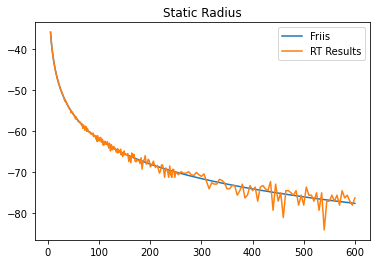

In [5]:
plt.title("Static Radius")
plt.plot(ds, true_fspl, label='Friis')
plt.plot(sim_ds, sim_freelosses, label='RT Results')
plt.legend(loc='upper right')
plt.show()

### Comparing Friis with actual RT simulation results
Dynamic size receiver radius. Set to sqrt(1/pi)/100 * dist. 

Rays shot = 2e7. Dynamic radius comes from 100 meters on the static receiver.

In [6]:
f3 = "dynamic_radius1.txt"
sim_ds = []
sim_freelosses_dynamic = []
with open(f3) as csvfile:
    rc = csv.reader(csvfile)
    first = True
    for row in rc:
        if first:
            first = False
            continue
        sim_ds.append(float(row[0]))
        sim_freelosses_dynamic.append(-1*float(row[1]))

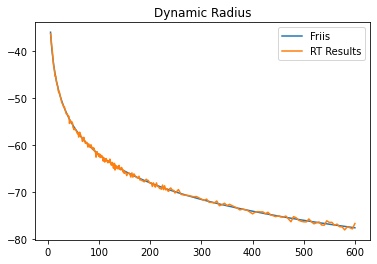

In [7]:
plt.title("Dynamic Radius")
plt.plot(ds, true_fspl, label='Friis')
plt.plot(sim_ds, sim_freelosses_dynamic, label='RT Results')
plt.legend(loc='upper right')
plt.show()